In [1]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
TRAIN_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/train"
TEST_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/test"
VALID_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/valid"
BATCH_SIZE=64

In [3]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 7000 in folder Circle
For training data, found 7000 in folder Pentagon
For training data, found 7000 in folder Square
For training data, found 7000 in folder Star
For training data, found 7000 in folder Triangle


In [4]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1000 in folder Circle
For testing data, found 1000 in folder Pentagon
For testing data, found 1000 in folder Square
For testing data, found 1000 in folder Star
For testing data, found 1000 in folder Triangle


In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [8]:
class_names = ['Triangle', 'Square', 'Circle', 'Star', 'Pentagon']

Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)


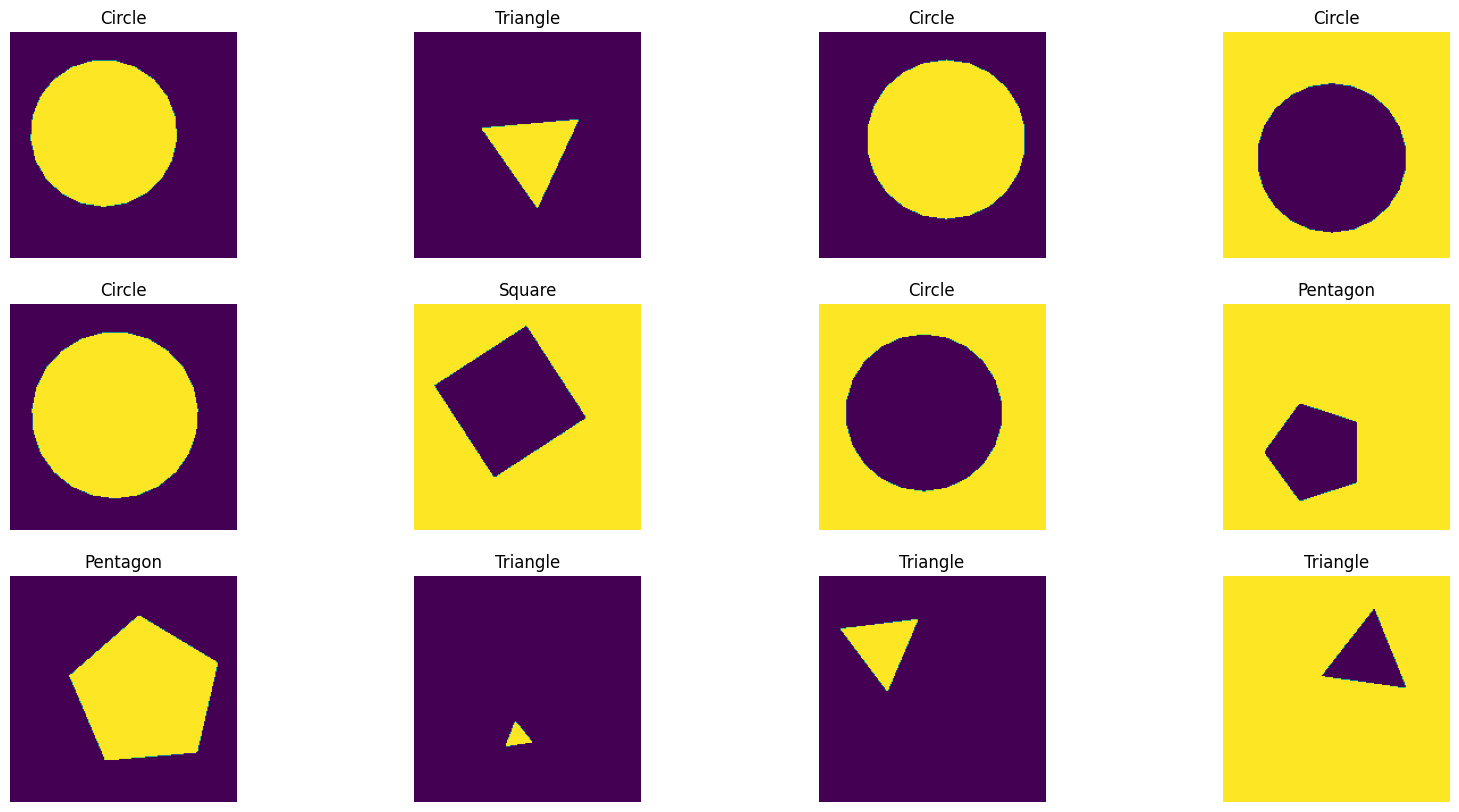

In [10]:
import cv2
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=TEST_DIR+ "/", target_class=class_name)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,target_size = (128, 128),batch_size = BATCH_SIZE,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR, target_size = (128, 128), batch_size = BATCH_SIZE, class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory(VALID_DIR, target_size = (128, 128), batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 35000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 10000 images belonging to 5 classes.


In [16]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(48, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(48, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 8, activation = 'relu'))

classifier.add(Dense(units = 5, activation = 'softmax'))

# Compiling the CNN

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
## model summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 48)      480       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 48)        20784     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        13856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)       

In [18]:
history = classifier.fit(training_set, epochs = 10,validation_data = valid_set)
classifier.save('model1.h5')

Epoch 1/10
547/547 [==============================] - 410s 747ms/step - loss: 1.2401 - accuracy: 0.4386 - val_loss: 0.9117 - val_accuracy: 0.6272
Epoch 2/10
547/547 [==============================] - 429s 783ms/step - loss: 0.7592 - accuracy: 0.6843 - val_loss: 0.7221 - val_accuracy: 0.7068
Epoch 3/10
547/547 [==============================] - 391s 715ms/step - loss: 0.5650 - accuracy: 0.7706 - val_loss: 0.6158 - val_accuracy: 0.7409
Epoch 4/10
547/547 [==============================] - 370s 677ms/step - loss: 0.4459 - accuracy: 0.8211 - val_loss: 0.4238 - val_accuracy: 0.8211
Epoch 5/10
547/547 [==============================] - 430s 787ms/step - loss: 0.3424 - accuracy: 0.8629 - val_loss: 0.3656 - val_accuracy: 0.8501
Epoch 6/10
547/547 [==============================] - 434s 792ms/step - loss: 0.3046 - accuracy: 0.8780 - val_loss: 0.3313 - val_accuracy: 0.8681
Epoch 7/10
547/547 [==============================] - 430s 787ms/step - loss: 0.2728 - accuracy: 0.8907 - val_loss: 0.2883 -

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
classifier.evaluate(test_set)

79/79 [==============================] - 15s 192ms/step - loss: 0.3017 - accuracy: 0.8900


[0.30165159702301025, 0.8899999856948853]

Text(0, 0.5, 'Loss')

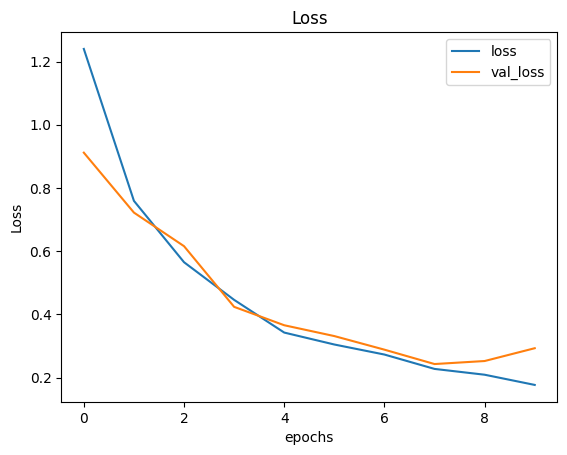

In [21]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

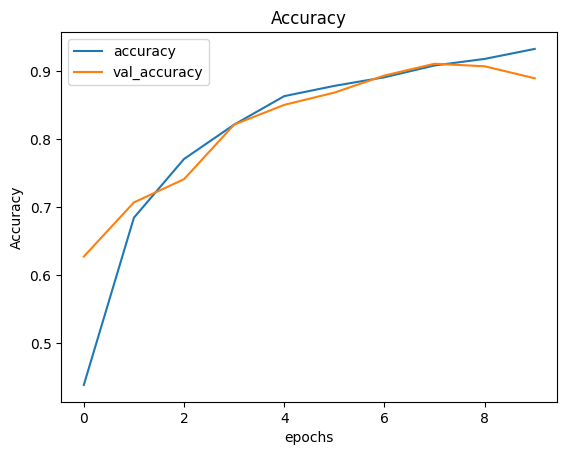

In [22]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')